# MARKETING IA

### ENTENDER EL ENUNCIADO DEL PROBLEMA Y EL CASO PRACTICO

* El marketing es fundamental para el crecimiento y sostenibilidad de cualquier negocio
* Los especialistas en marketing pueden ayudar a desarrollar la marca de la empresa, atraer clientes, aumentar los ingresos y aumentar las ventas
    * EDUCACION: Los especialistas en marketing educan y comunican la propuesta de valor a sus clientes
    * CRECIMIENTO: Los especialistas en marketing potencial el crecimiento empresarial llegando a nuevos clientes
    * ENGAGEMENT: Los especialistas en marketing involucran a los clientes y comprenden sus necesidades
    * VENTAS: Los especialistas en marketing impulsan las ventas y el trafico de productos y servicios
* Uno de los puntos criticos para los especialistas en marketing es conocer a sus clientes e identificar sus necesidades
* Al comprender al cliente, los especialistas en marketing pueden lanzar una campaña de marketing dirigida que se adapte a necesidades especificas
* Si los datos sobre los clientes estan disponibles, la ciencia de datos se puede aplicar para realizar la segmentacion del mercado
* En este caso practico, nos han contratado como experto en data science para una empresa minorista de Seattle, USA
* La empresa tiene muchos datos de sus clientes de los ultimos 2 años y medio
* Se nos encomienda la tarea de crear campañas de marketing enfocadas a los clientes, dividiendolos para ello en por lo menos 3 segmentos diferentes

### LOS DATOS TIENEN BASTANTES COLUMNAS
* ORDERNUMBER: Identificador del pedido
* QUANTITYORDERED: Numero de items comprados
* PRICEEACH: Precio de cada item
* SALES: Total de ventas efectuadas
* ORDERDATE: Fecha del pedido realizado
* STATUS: Estado del pedido
* QTR_ID: Trimestre en el que se hace el pedido
* MONTH_ID: Mes en el que se hace el pedido
* YEAR_ID: Año en el que se hace el pedido
* PRODUCTLINE: Categoria del Producto
* CUSTOMERNAME: Nombre del cliente
* PHONE: Numero de telefomo
* ADDRESSLINE1: Direccion del envio
* ADDRESSLINE2: Direccion del envio
* CITY: Ciudad en la que reside el cliente
* STATE: Estado en el que reside el cliente
* POSTALCODE: Codigo postal del cliente
* COUNTRY: Pais en el que reside el cliente
* TERRITORY: Territorio en el que reside el cliente
* DEALSIZE: Tamaño del pedido
* CONTACTFISTNAME: Nombre del contacto
* CONTACTLASTNAME: Apellido del contacto

### LIBRERIAS

In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile
import cv2
import tensorflow as tf
from tensorflow.python.keras import Sequential
from tensorflow.keras import layers, optimizers
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
from IPython.display import display
from tensorflow.keras import backend as K
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity
import plotly.express as px
import plotly.graph_objects as go

### DATASET

In [76]:
path = "../dataset/Marketing/"

In [77]:
sales_df = pd.read_csv(path + 'sales_data_sample.csv', encoding = 'unicode_escape')
sales_df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small


In [78]:
sales_df.dtypes

ORDERNUMBER           int64
QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
ORDERDATE            object
STATUS               object
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
PRODUCTLINE          object
MSRP                  int64
PRODUCTCODE          object
CUSTOMERNAME         object
PHONE                object
ADDRESSLINE1         object
ADDRESSLINE2         object
CITY                 object
STATE                object
POSTALCODE           object
COUNTRY              object
TERRITORY            object
CONTACTLASTNAME      object
CONTACTFIRSTNAME     object
DEALSIZE             object
dtype: object

### TAREA 1
* Convertir la fecha del pedido en formato de fecha y hora usando pandas
* Verificar que la conversion este imprimiendo el dato correctamente

In [79]:
# Convertir la fecha del pedido en formato fecha y hora
sales_df['ORDERDATE'] = pd.to_datetime(sales_df['ORDERDATE'])
sales_df.dtypes

ORDERNUMBER                  int64
QUANTITYORDERED              int64
PRICEEACH                  float64
ORDERLINENUMBER              int64
SALES                      float64
ORDERDATE           datetime64[ns]
STATUS                      object
QTR_ID                       int64
MONTH_ID                     int64
YEAR_ID                      int64
PRODUCTLINE                 object
MSRP                         int64
PRODUCTCODE                 object
CUSTOMERNAME                object
PHONE                       object
ADDRESSLINE1                object
ADDRESSLINE2                object
CITY                        object
STATE                       object
POSTALCODE                  object
COUNTRY                     object
TERRITORY                   object
CONTACTLASTNAME             object
CONTACTFIRSTNAME            object
DEALSIZE                    object
dtype: object

### TAREA 2
* Cuantos datos nulos existen en 'ADDRESSLINE2'

In [81]:
# Comprobar el numero de datos no nulos del data frame
sales_df.info()

# Comprobar el numero de elementos nulos del data frame
sales_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ORDERNUMBER       2823 non-null   int64         
 1   QUANTITYORDERED   2823 non-null   int64         
 2   PRICEEACH         2823 non-null   float64       
 3   ORDERLINENUMBER   2823 non-null   int64         
 4   SALES             2823 non-null   float64       
 5   ORDERDATE         2823 non-null   datetime64[ns]
 6   STATUS            2823 non-null   object        
 7   QTR_ID            2823 non-null   int64         
 8   MONTH_ID          2823 non-null   int64         
 9   YEAR_ID           2823 non-null   int64         
 10  PRODUCTLINE       2823 non-null   object        
 11  MSRP              2823 non-null   int64         
 12  PRODUCTCODE       2823 non-null   object        
 13  CUSTOMERNAME      2823 non-null   object        
 14  PHONE             2823 n

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [82]:
# Dado que hay muchos valores nulos en 'addressline2', 'state', 'postalcode' y
# 'territorio', podemos eliminarlos

# Country representa la informacion geografica del pedido
# Tambien podemos eliminar la ciudad, la direccion, el telefono, el nombre del
# contacto, apellido del contacto ya que no son necesarios para el trabajo
df_drop = ['ADDRESSLINE1', 'ADDRESSLINE2', 'POSTALCODE', 'CITY', 'TERRITORY', 'PHONE',
'STATE', 'CONTACTFIRSTNAME', 'CONTACTLASTNAME', 'CUSTOMERNAME', 'ORDERNUMBER']

sales_df = sales_df.drop(df_drop, axis = 1)
sales_df.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,COUNTRY,DEALSIZE
0,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,Motorcycles,95,S10_1678,USA,Small
1,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,Motorcycles,95,S10_1678,France,Small
2,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,Motorcycles,95,S10_1678,France,Medium
3,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,Motorcycles,95,S10_1678,USA,Medium
4,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,Motorcycles,95,S10_1678,USA,Medium


### TAREA 3
* Cuantos valores unicos existen en 'pais'?
* Cuantos codigos de productos unicos y lineas de productos tenemos?

In [83]:
# Obtener las observaciones unicas de cada columnas
sales_df.nunique()

QUANTITYORDERED      58
PRICEEACH          1016
ORDERLINENUMBER      18
SALES              2763
ORDERDATE           252
STATUS                6
QTR_ID                4
MONTH_ID             12
YEAR_ID               3
PRODUCTLINE           7
MSRP                 80
PRODUCTCODE         109
COUNTRY              19
DEALSIZE              3
dtype: int64

### ANALISIS EXPLORATORIO DE LOS DATOS Y LIMPIEZA DE DATOS - PARTE 1

In [84]:
sales_df['COUNTRY'].value_counts().index

Index(['USA', 'Spain', 'France', 'Australia', 'UK', 'Italy', 'Finland',
       'Norway', 'Singapore', 'Canada', 'Denmark', 'Germany', 'Sweden',
       'Austria', 'Japan', 'Belgium', 'Switzerland', 'Philippines', 'Ireland'],
      dtype='object')

In [85]:
sales_df['COUNTRY'].value_counts()

USA            1004
Spain           342
France          314
Australia       185
UK              144
Italy           113
Finland          92
Norway           85
Singapore        79
Canada           70
Denmark          63
Germany          62
Sweden           57
Austria          55
Japan            52
Belgium          33
Switzerland      31
Philippines      26
Ireland          16
Name: COUNTRY, dtype: int64

In [86]:
# Función para visualizar el recuento de elementos en una columna determinada
# Ten en cuenta que Plotly es una librería de gráficos de Python que crea gráficos interactivos con calidad de publicación.
# Compruébalo en: https://plotly.com/python/
# Nota: px (plotly_express) es un wrapper de alto nivel entorno a plotly para una rápida exploración de datos y generación de figuras
# Compruébalo en: https://plotly.github.io/plotly_express

def barplot_visualization(x):
    fig = plt.Figure(figsize = (12, 6))
    fig = px.bar(
        x = sales_df[x].value_counts().index,
        y = sales_df[x].value_counts(),
        color = sales_df[x].value_counts().index,
        height = 600
    )
    fig.show() 

In [87]:
# Grafico para los distintos paises segun el valor de COUNTRY
barplot_visualization('COUNTRY')

### TAREA 4
* Cuantos valores de estado de pedido unico tenemos?
* Tenemos un conjunto de datos balanceado? Comenta el resultado y propone soluciones para resolver el problema

In [88]:
barplot_visualization('STATUS')

El dataset esta muy desbalanceado.

In [89]:
df_drop = ['STATUS']

sales_df = sales_df.drop(columns = df_drop, axis = 1)
sales_df.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,COUNTRY,DEALSIZE
0,30,95.70,2,2871.00,2003-02-24,1,2,2003,Motorcycles,95,S10_1678,USA,Small
1,34,81.35,5,2765.90,2003-05-07,2,5,2003,Motorcycles,95,S10_1678,France,Small
2,41,94.74,2,3884.34,2003-07-01,3,7,2003,Motorcycles,95,S10_1678,France,Medium
3,45,83.26,6,3746.70,2003-08-25,3,8,2003,Motorcycles,95,S10_1678,USA,Medium
4,49,100.00,14,5205.27,2003-10-10,4,10,2003,Motorcycles,95,S10_1678,USA,Medium


In [90]:
barplot_visualization('PRODUCTLINE')

In [91]:
barplot_visualization('DEALSIZE')

In [92]:
# Funcion para agregar variables ficticias para reemplazar variables categoricas
def dummies(x):
    dummy = pd.get_dummies(sales_df[x])
    sales_df.drop(columns=x, inplace=True)
    return pd.concat([sales_df, dummy], axis=1)

In [93]:
sales_df = dummies('COUNTRY')
sales_df

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,...,Italy,Japan,Norway,Philippines,Singapore,Spain,Sweden,Switzerland,UK,USA
0,30,95.70,2,2871.00,2003-02-24,1,2,2003,Motorcycles,95,...,0,0,0,0,0,0,0,0,0,1
1,34,81.35,5,2765.90,2003-05-07,2,5,2003,Motorcycles,95,...,0,0,0,0,0,0,0,0,0,0
2,41,94.74,2,3884.34,2003-07-01,3,7,2003,Motorcycles,95,...,0,0,0,0,0,0,0,0,0,0
3,45,83.26,6,3746.70,2003-08-25,3,8,2003,Motorcycles,95,...,0,0,0,0,0,0,0,0,0,1
4,49,100.00,14,5205.27,2003-10-10,4,10,2003,Motorcycles,95,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,20,100.00,15,2244.40,2004-12-02,4,12,2004,Ships,54,...,0,0,0,0,0,1,0,0,0,0
2819,29,100.00,1,3978.51,2005-01-31,1,1,2005,Ships,54,...,0,0,0,0,0,0,0,0,0,0
2820,43,100.00,4,5417.57,2005-03-01,1,3,2005,Ships,54,...,0,0,0,0,0,1,0,0,0,0
2821,34,62.24,1,2116.16,2005-03-28,1,3,2005,Ships,54,...,0,0,0,0,0,0,0,0,0,0


### TAREA 5
* Obtener dummies para la linea de productos y columnas de tamaño de oferta
* Realizar una prueba de verificacion y ver si la transformacion es correcta

In [94]:
sales_df = dummies('PRODUCTLINE')
sales_df = dummies('DEALSIZE')
sales_df

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,QTR_ID,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,...,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Large,Medium,Small
0,30,95.70,2,2871.00,2003-02-24,1,2,2003,95,S10_1678,...,0,1,0,0,0,0,0,0,0,1
1,34,81.35,5,2765.90,2003-05-07,2,5,2003,95,S10_1678,...,0,1,0,0,0,0,0,0,0,1
2,41,94.74,2,3884.34,2003-07-01,3,7,2003,95,S10_1678,...,0,1,0,0,0,0,0,0,1,0
3,45,83.26,6,3746.70,2003-08-25,3,8,2003,95,S10_1678,...,0,1,0,0,0,0,0,0,1,0
4,49,100.00,14,5205.27,2003-10-10,4,10,2003,95,S10_1678,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,20,100.00,15,2244.40,2004-12-02,4,12,2004,54,S72_3212,...,0,0,0,1,0,0,0,0,0,1
2819,29,100.00,1,3978.51,2005-01-31,1,1,2005,54,S72_3212,...,0,0,0,1,0,0,0,0,1,0
2820,43,100.00,4,5417.57,2005-03-01,1,3,2005,54,S72_3212,...,0,0,0,1,0,0,0,0,1,0
2821,34,62.24,1,2116.16,2005-03-28,1,3,2005,54,S72_3212,...,0,0,0,1,0,0,0,0,0,1


In [95]:
y = pd.Categorical(sales_df['PRODUCTCODE'])
y

['S10_1678', 'S10_1678', 'S10_1678', 'S10_1678', 'S10_1678', ..., 'S72_3212', 'S72_3212', 'S72_3212', 'S72_3212', 'S72_3212']
Length: 2823
Categories (109, object): ['S10_1678', 'S10_1949', 'S10_2016', 'S10_4698', ..., 'S700_3962', 'S700_4002', 'S72_1253', 'S72_3212']

In [96]:
y = pd.Categorical(sales_df['PRODUCTCODE']).codes
y

array([  0,   0,   0, ..., 108, 108, 108], dtype=int8)

In [97]:
# Dado que el numero de codigo de producto tiene 109 valores distintos, si agregamos variables one-hot
# Serian 109 columnas adicionales, podemos evitarlo usando la codificacion categorica
# Esta no es la forma optima de lidiar con esto, pero es importante reducir la dimensionalidad
sales_df['PRODUCTCODE'] = pd.Categorical(sales_df['PRODUCTCODE']).codes
sales_df

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,QTR_ID,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,...,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Large,Medium,Small
0,30,95.70,2,2871.00,2003-02-24,1,2,2003,95,0,...,0,1,0,0,0,0,0,0,0,1
1,34,81.35,5,2765.90,2003-05-07,2,5,2003,95,0,...,0,1,0,0,0,0,0,0,0,1
2,41,94.74,2,3884.34,2003-07-01,3,7,2003,95,0,...,0,1,0,0,0,0,0,0,1,0
3,45,83.26,6,3746.70,2003-08-25,3,8,2003,95,0,...,0,1,0,0,0,0,0,0,1,0
4,49,100.00,14,5205.27,2003-10-10,4,10,2003,95,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,20,100.00,15,2244.40,2004-12-02,4,12,2004,54,108,...,0,0,0,1,0,0,0,0,0,1
2819,29,100.00,1,3978.51,2005-01-31,1,1,2005,54,108,...,0,0,0,1,0,0,0,0,1,0
2820,43,100.00,4,5417.57,2005-03-01,1,3,2005,54,108,...,0,0,0,1,0,0,0,0,1,0
2821,34,62.24,1,2116.16,2005-03-28,1,3,2005,54,108,...,0,0,0,1,0,0,0,0,0,1


### ANALISIS EXPLORATORIO DE LOS DATOS Y LIMPIEZA DE DATOS - PARTE 2

In [98]:
# Agrupamos los datos segun la fecha del pedido
sales_df_group = sales_df.groupby(by = 'ORDERDATE').sum()
sales_df_group

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,Australia,...,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Large,Medium,Small
ORDERDATE,,,,,,,,,,,,,,,,,,,,,
2003-01-06,151,288.78,10,12133.25,4,4,8012,363,174.0,0,...,0,0,0,0,0,0,4,0,2,2
2003-01-09,142,284.96,10,11432.34,4,4,8012,372,181.0,0,...,0,0,0,0,0,0,4,0,2,2
2003-01-10,80,150.14,3,6864.05,2,2,4006,155,37.0,0,...,0,0,0,0,0,0,2,0,1,1
2003-01-29,541,1417.54,136,54702.00,16,16,32048,1695,723.0,0,...,3,0,0,0,0,7,6,0,10,6
2003-01-31,443,1061.89,91,44621.96,13,13,26039,1365,720.0,0,...,7,0,0,0,2,4,0,0,8,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-05-13,259,561.18,21,31821.90,12,30,12030,728,101.0,0,...,0,6,0,0,0,0,0,2,3,1
2005-05-17,509,1269.43,105,59475.10,28,70,28070,1669,462.0,0,...,14,0,0,0,0,0,0,2,8,4
2005-05-29,607,1148.40,94,51233.18,30,75,30075,1328,797.0,13,...,7,0,0,0,0,0,8,0,8,7


### TAREA 6 
* Segun los datos, cuando alcanzan su punto maximo las ventas (en que mes)?
* Apoya tu respuesta con visualizaciones / graficos

In [99]:
fig = plt.Figure(figsize = (12, 6))
fig = px.line(
    x = sales_df_group.index,
    y = sales_df_group.SALES,
    title = 'SALES',
    height = 600
)
fig.show()


In [100]:
# Podemos eliminar 'ORDERDATE' y quedarnos con el resto de dato relacionados
# con la fecha como 'MONTH'
sales_df.drop("ORDERDATE", axis=1, inplace=True)
sales_df.shape

(2823, 38)

### TAREA 7
* Representar la matriz de correlacion entre variables 
* Comentar los resultados de la matriz

<AxesSubplot:>

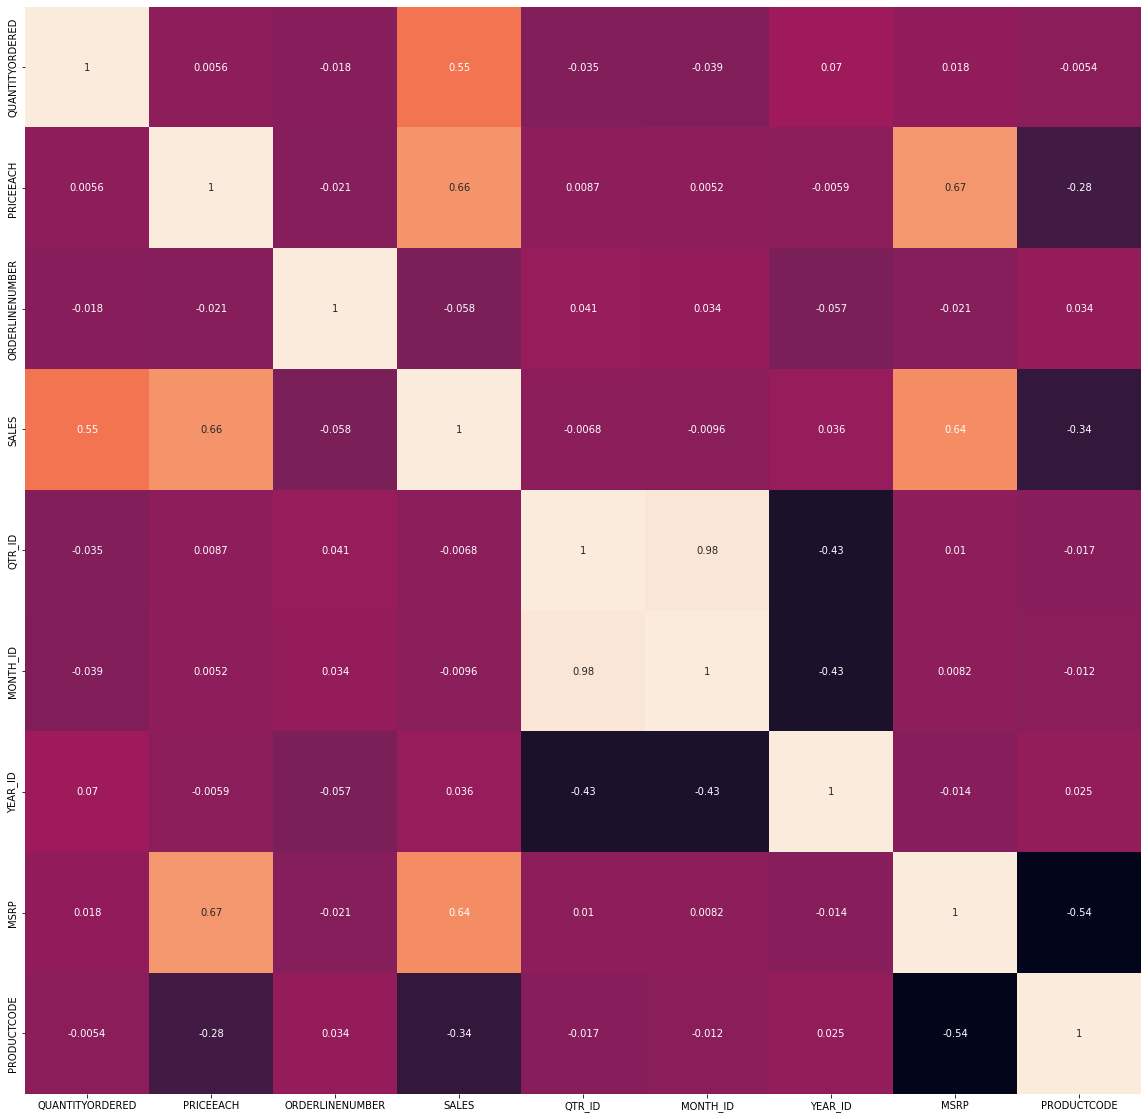

In [101]:
plt.figure(figsize=(20, 20))
corr_matrix = sales_df.iloc[:, :9].corr()
sns.heatmap(corr_matrix, annot=True, cbar=False)

In [102]:
# Parece que el ID del trimestre y los ID des mes estan altamente correlacionados
# Dejemos MONTH
sales_df.drop('QTR_ID', axis=1, inplace=True)
sales_df.shape

(2823, 37)

##### VAMOS A REPRESENTAR DISTRIBUCIONES

Displot muestra el histograma, kde plot y rug plot

* 1 HISTOGRAMA: Es una visualizacion grafica de datos que usa barras con varias alturas. Cada barra agrupa los numeros en rangos y las barras mas altas muestran que hay mas datos en ese rango
* 2 KDE PLOT: Densidad de la estimacion de la funcion de densidad que se utiliza para visualizar la densidad de probabilidad de una variable continua
* 3 RUG PLOT o GRAFICO DE ALFOMBRAS: Grafico de datos para una unica variable cuantitativa, que se muestra como marcas a lo largo de un eje (grafico de dispersion unidimensional)

In [103]:
import plotly.figure_factory as ff

plt.figure(figsize=(10, 10))

for i in range(8):
    if sales_df.columns[i] != 'ORDERLINENUMBER':
        fig = ff.create_distplot(
            [sales_df[sales_df.columns[i]].apply(lambda x: float(x))],
            ['distplot']
        )

        fig.update_layout(title_text = sales_df.columns[i])

        fig.show()


<Figure size 720x720 with 0 Axes>

In [104]:
# Visualizar la relacion entre variables usando parcelas
plt.figure(figsize=(15, 15))

fig = px.scatter_matrix(
    sales_df,
    dimensions=sales_df.columns[:8],
    color = 'MONTH_ID'
)

fig.update_layout(
    title = 'Sales Data', 
    width = 1100,
    height = 1100
)

fig.show()

<Figure size 1080x1080 with 0 Axes>

### ENTENDER LA TEORIA Y LA INTUICION DETRAS DEL CLUSTERING CON K-MEANS

* K-Means es un algoritmo de aprendizaje no supervisado (clustering)
* K-Means funciona agrupando algunos puntos de datos (clustering) de forma no supervisada. El algoritmo agrupa las observaciones con valores de atributos similiares al medir la distancia euclidiana entre puntos


#### PASOS DEL ALGORITMO DE K-MEANS
* 1. Elegir el numero de clusters K
* 2. Seleccionar K puntos aleatorios que seran los centroides de cada cluster
* 3. Asignar cada punto del dataset al centroide mas cercano, hacerlo nos permitira crear un numero K de clusters con dichos puntos
* 4. Calcular un nuevo centroide para cada cluster
* 5. Reasignar cada punto de datos al nuevo centroide mas cercano
* 6. Ir al paso 4 y repetir
 

### NUMERO OPTIMOS DE CLUSTER UTILIZANDO EL METODO DEL CODO

In [105]:
# Escalamos los datos
scaler = StandardScaler()
sales_df_scaled = scaler.fit_transform(sales_df)
sales_df_scaled.shape

(2823, 37)

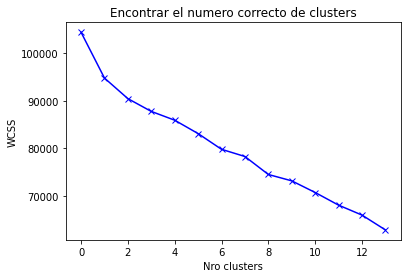

In [112]:
scores = []

range_values = range(1, 15)

for i in range_values:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(sales_df_scaled)
    scores.append(kmeans.inertia_) # La inercia es la suma de los cuadrados de las distancias de las observacion al centro del cluster mas cercano

plt.plot(scores, 'bx-')
plt.title('Encontrar el numero correcto de clusters')
plt.xlabel('Nro clusters')
plt.ylabel('WCSS')
plt.show()

### APLICAR EL METODO K-MEANS

In [113]:
# Agrupar los datos usando k-means
kmeans = KMeans(5)
kmeans.fit(sales_df_scaled)
labels = kmeans.labels_
labels

array([2, 2, 3, ..., 3, 2, 3], dtype=int32)

In [114]:
kmeans.cluster_centers_.shape

(5, 37)

In [115]:
# Echemos un vistazo a los centros de los clusteres
cluster_centers = pd.DataFrame(
    data = kmeans.cluster_centers_,
    columns = [sales_df.columns]
)
cluster_centers

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,Australia,Austria,...,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Large,Medium,Small
0,0.010285,0.152186,-0.131095,0.070903,0.473773,0.013539,0.101390,-0.164484,-0.264819,-0.140961,...,-0.093345,-0.200857,-0.179374,0.335664,-0.059748,0.279807,-0.010937,-0.089568,0.107222,-0.066429
1,0.063251,0.644457,0.020633,0.500355,0.025162,-0.040701,0.819456,-0.548721,-0.045597,0.107624,...,1.385402,-0.364452,-0.348674,-0.300637,-0.167454,-0.345470,-0.523371,-0.242672,0.903922,-0.795878
2,-0.457820,-0.758275,0.042756,-0.819909,-0.003201,-0.013177,-0.632485,0.328126,0.031828,-0.017031,...,-0.202743,0.031058,0.086864,0.063238,0.082923,-0.041548,0.100035,-0.242672,-0.980703,1.096370
3,0.396348,0.529533,-0.019018,0.389790,-0.028576,0.018633,0.117278,0.052965,0.016885,-0.045304,...,-0.721812,0.207147,0.146201,0.139649,0.017019,0.308776,0.228497,-0.242672,1.019676,-0.912100
4,1.264271,0.800092,-0.261504,2.581716,-0.085287,0.144435,1.412341,-0.861488,-0.082322,0.045752,...,0.569706,0.016566,-0.161898,-0.300637,-0.127846,-0.199144,-0.146484,4.120788,-0.980703,-0.912100


In [116]:
# Para entender lo que significan estos numeros, hacemos una transformacion inversa
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [sales_df.columns])
cluster_centers

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,Australia,Austria,...,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Large,Medium,Small
0,35.192982,86.728246,5.912281,3684.459825,8.824561,2003.824561,104.789474,48.578947,2.775558e-17,0.000000,...,2.982456e-01,5.263158e-02,5.263158e-02,1.754386e-01,1.754386e-02,1.929825e-01,2.105263e-01,3.508772e-02,5.438596e-01,4.210526e-01
1,35.708861,96.657703,6.553345,4475.313092,7.184448,2003.786618,133.641953,36.444846,5.424955e-02,0.034358,...,1.000000e+00,2.775558e-17,9.714451e-17,-6.938894e-17,-4.510281e-17,1.249001e-16,4.163336e-16,-9.020562e-17,9.421338e-01,5.786618e-02
2,30.633768,68.363597,6.646819,2043.993915,7.080750,2003.805873,75.301794,64.135400,7.340946e-02,0.017129,...,2.463295e-01,1.272431e-01,1.353997e-01,1.003263e-01,4.078303e-02,9.380098e-02,2.561175e-01,-9.714451e-17,-8.326673e-16,1.000000e+00
3,38.953125,94.339603,6.385817,4271.701923,6.987981,2003.828125,105.427885,55.445913,6.971154e-02,0.013221,...,6.106227e-16,1.838942e-01,1.538462e-01,1.213942e-01,3.004808e-02,2.019231e-01,3.088942e-01,-9.714451e-17,1.000000e+00,8.881784e-16
4,47.406452,99.796968,5.361290,8308.219097,6.780645,2003.916129,157.464516,26.567742,4.516129e-02,0.025806,...,6.129032e-01,1.225806e-01,5.806452e-02,-2.775558e-17,6.451613e-03,4.516129e-02,1.548387e-01,1.000000e+00,-2.220446e-16,0.000000e+00


* Clúster 4 (más alto): este grupo representa a los clientes que compran artículos en una gran cantidad centrada en ~ 47, compran artículos en todos los rangos de precios inclinándose hacia artículos de alto precio de ~ 99. También corresponden a las ventas totales más altas alrededor de ~ 8296 y están activas durante todo el año. Son los mayores compradores de productos con un MSRP alto ~ 158.
* Clúster 2: este grupo representa a los clientes que compran artículos en cantidades variables ~ 35, tienden a comprar artículos de alto precio ~ 96. Sus ventas son un poco mejores en promedio ~ 4435, compran productos con el segundo MSRP más alto de ~ 133.
* Clúster 0 (más bajo): este grupo representa a los clientes que compran artículos en cantidades bajas ~ 30. Suelen comprar artículos de bajo precio ~ 68. Sus ventas ~ 2044 son más bajas que las de otros grupos y son extremadamente activos durante la temporada navideña. Compran productos con un MSRP bajo ~ 75.
* Clúster 1: este grupo representa a los clientes que solo están activos durante las vacaciones. compran en menor cantidad ~ 35, pero tienden a comprar artículos de precio promedio alrededor de ~ 86. También corresponden a ventas totales más bajas alrededor de ~ 3673, tienden a comprar artículos con MSRP alrededor de 102.
* Clúster 3: este grupo representa a los clientes que compran artículos en cantidad variable ~ 39, tienden a comprar artículos de precio promedio ~ 94. Sus ventas ~ 4280.

In [117]:
print(labels.shape)
print(labels.max())
print(labels.min())

(2823,)
4
0


In [118]:
y_kmeans = kmeans.fit_predict(sales_df_scaled)
y_kmeans

array([1, 1, 2, ..., 2, 1, 2], dtype=int32)

In [119]:
# Agregar una etiqueta (que cluster) corresponde a cada punto de datos
sales_df_cluster = pd.concat([sales_df, pd.DataFrame({'cluster':labels})], axis=1)
sales_df_cluster

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,Australia,Austria,...,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Large,Medium,Small,cluster
0,30,95.70,2,2871.00,2,2003,95,0,0,0,...,1,0,0,0,0,0,0,0,1,2
1,34,81.35,5,2765.90,5,2003,95,0,0,0,...,1,0,0,0,0,0,0,0,1,2
2,41,94.74,2,3884.34,7,2003,95,0,0,0,...,1,0,0,0,0,0,0,1,0,3
3,45,83.26,6,3746.70,8,2003,95,0,0,0,...,1,0,0,0,0,0,0,1,0,3
4,49,100.00,14,5205.27,10,2003,95,0,0,0,...,1,0,0,0,0,0,0,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,20,100.00,15,2244.40,12,2004,54,108,0,0,...,0,0,1,0,0,0,0,0,1,2
2819,29,100.00,1,3978.51,1,2005,54,108,0,0,...,0,0,1,0,0,0,0,1,0,3
2820,43,100.00,4,5417.57,3,2005,54,108,0,0,...,0,0,1,0,0,0,0,1,0,3
2821,34,62.24,1,2116.16,3,2005,54,108,0,0,...,0,0,1,0,0,0,0,0,1,2


In [120]:
sales_df['ORDERLINENUMBER'] = sales_df['ORDERLINENUMBER'].apply(lambda x: float(x))

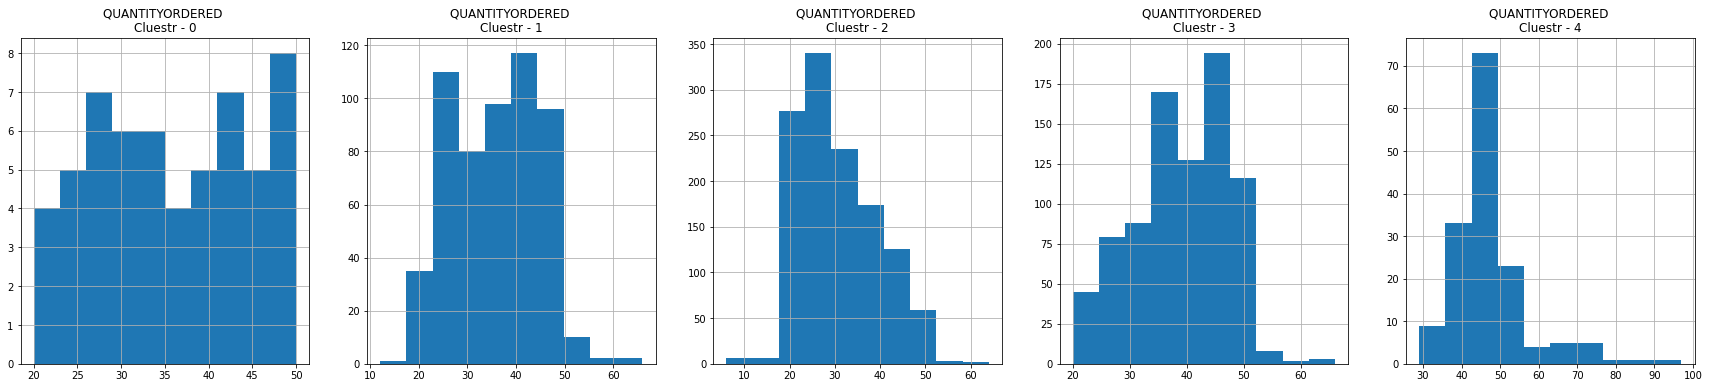

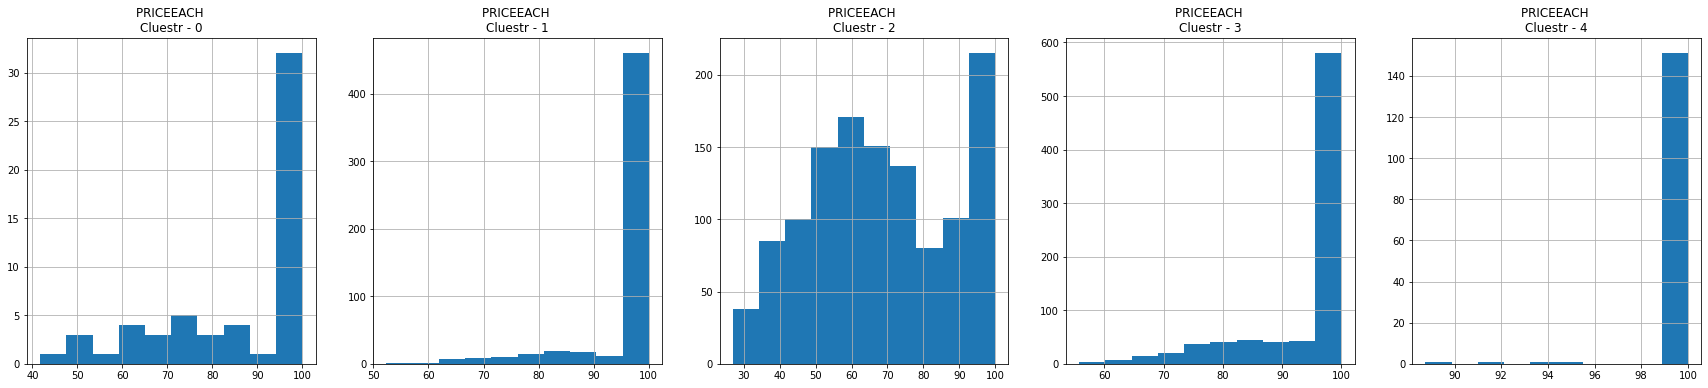

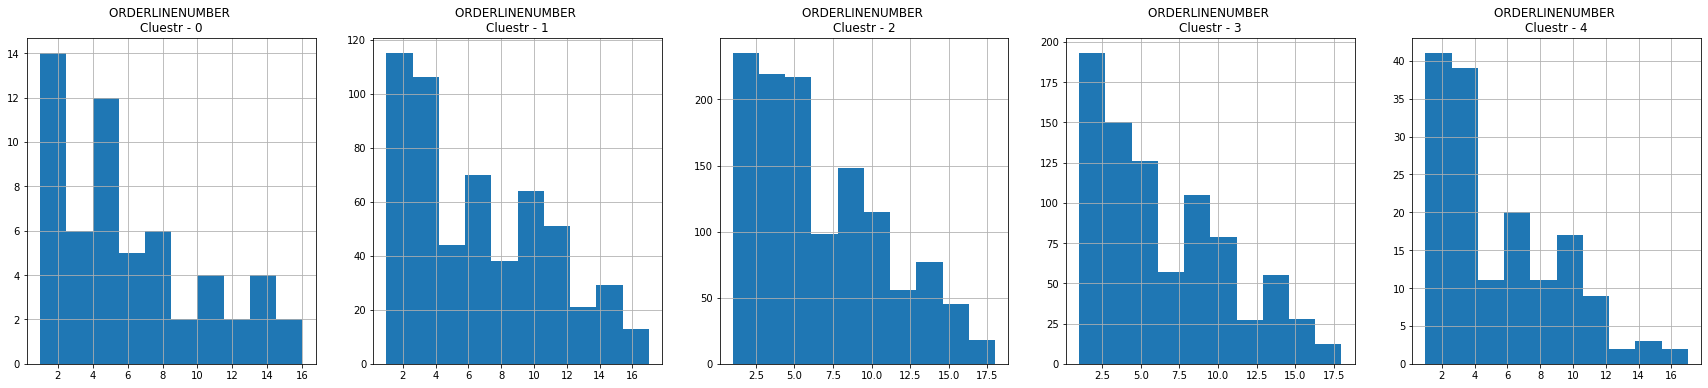

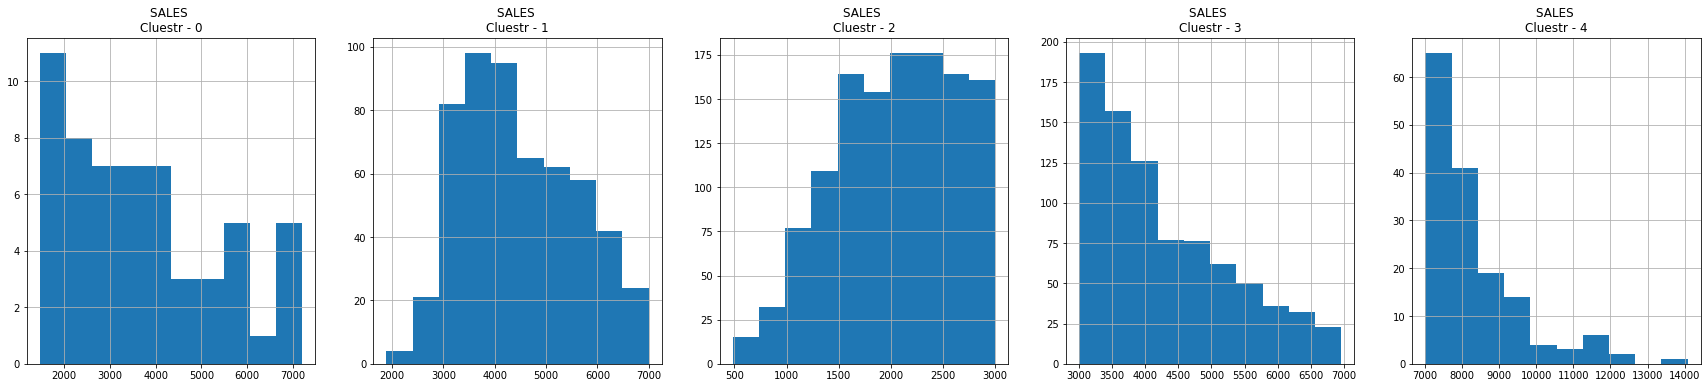

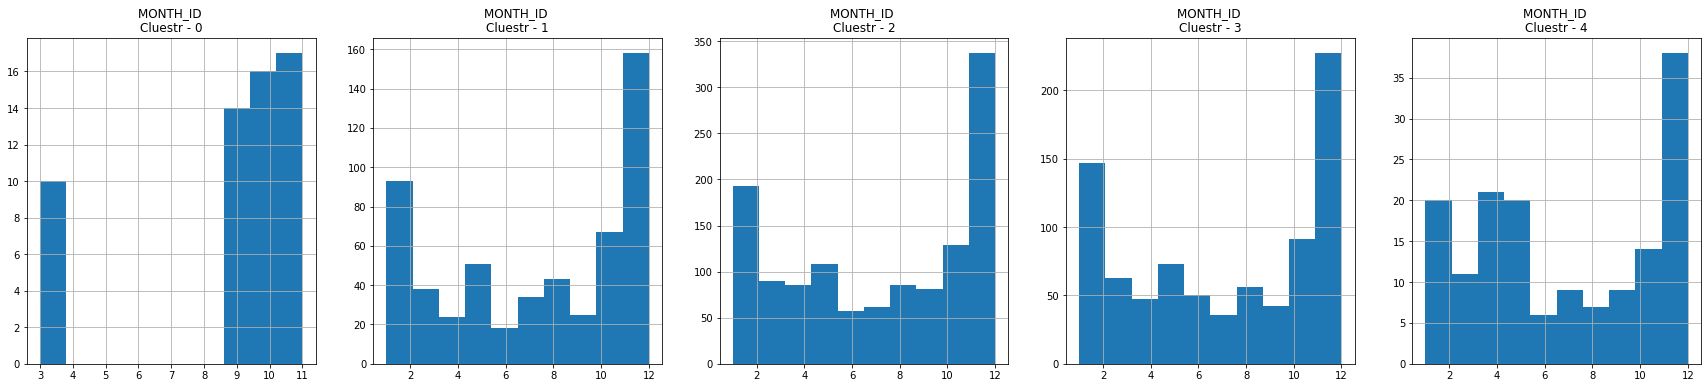

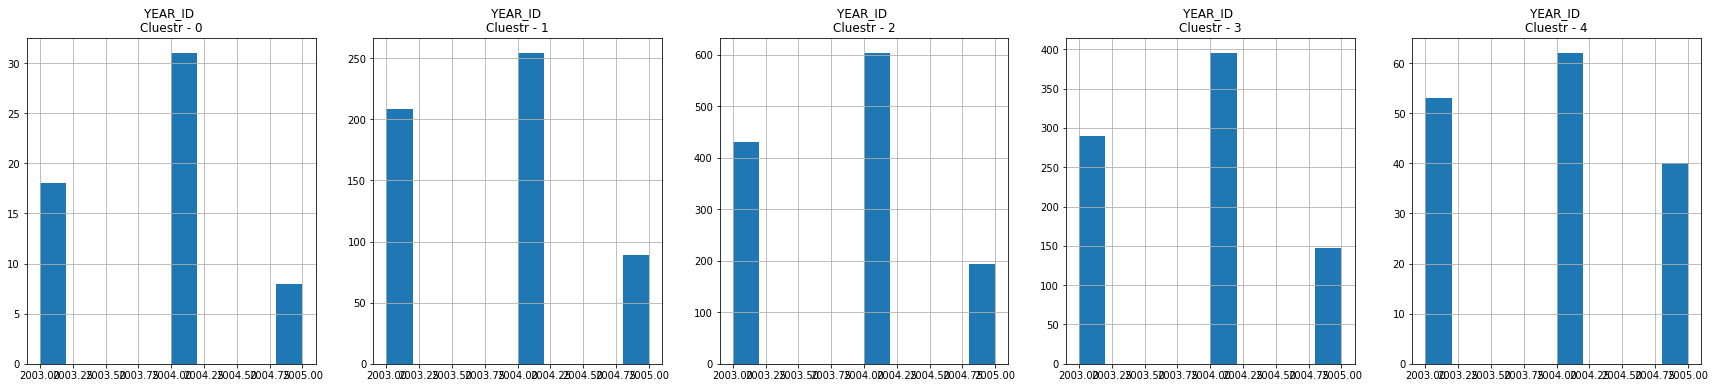

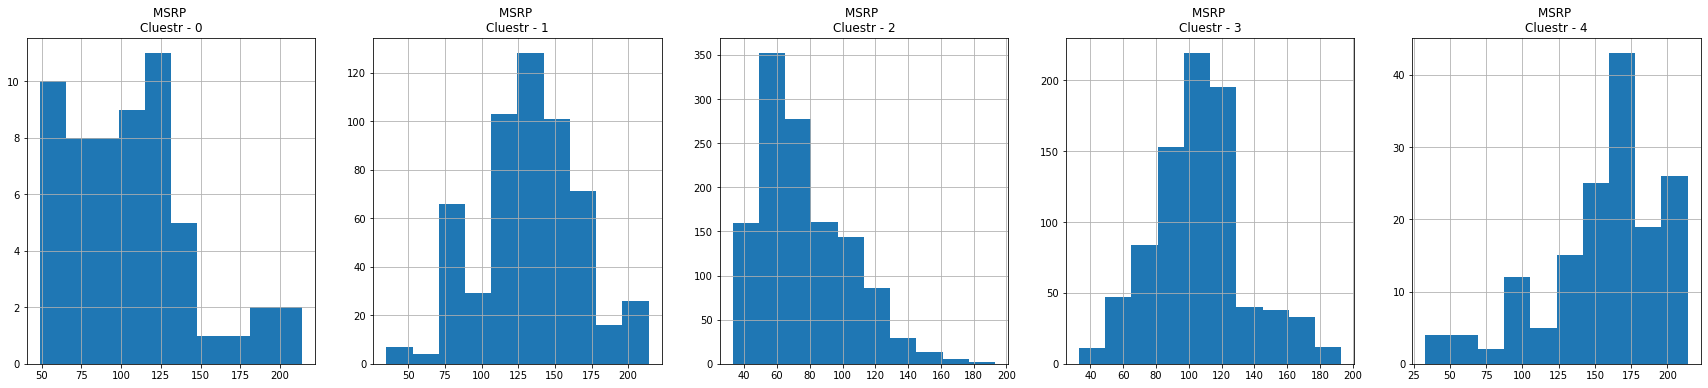

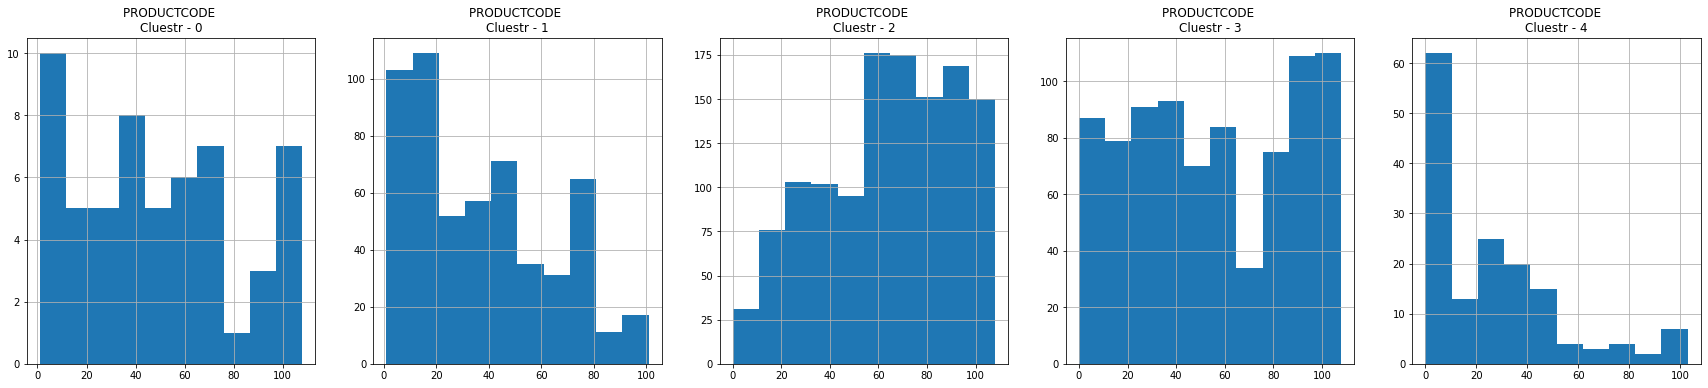

In [121]:
# Representar un histograma para cada caracteristica segun el cluster al que pertenece
for i in sales_df.columns[:8]:
    plt.figure(figsize=(30, 6))
    for k in range(5):
        plt.subplot(1, 5, k+1)
        cluster = sales_df_cluster[sales_df_cluster['cluster'] == k]
        cluster[i].hist()
        plt.title('{} \nCluestr - {}'.format(i, k))

    plt.show()

### APLICAR EL ANALISIS DE COMPONENTES PRINCIPALES Y VISUALIZAR LOS RESULTADOS

#### REPASO DEL ANALISIS DE COMPONENTES PRINCIPALES

* PCA es un algoritmo de aprendizaje automatico no supervisado
* PCA realiza reducciones de dimensionalidad mientras intenta mantener la informacion original sin cambios
* PCA funciona tratando de encontrar un nuevo conjunto de caracteristicas llamadas componentes. Los componentes son compuestos de las caracteristicas de entrada o no correlacionadas entre si

In [122]:
# Reducir los datos originales a 3 dimensiones usando PCA para visualizar los clusters
pca = PCA(n_components=3)
principal_comp = pca.fit_transform(sales_df_scaled)
principal_comp

array([[-0.48628661, -1.24045417,  1.08497929],
       [-0.78462518, -1.07067441,  1.46159917],
       [ 1.43146214,  0.07914032,  0.33198303],
       ...,
       [ 0.38987618,  4.12708305, -0.07150484],
       [-2.78893532,  2.46351793,  1.56699934],
       [-0.70551088,  3.3653712 , -0.50394295]])

In [125]:
pca_df = pd.DataFrame(data=principal_comp, columns=['pca1', 'pca2', 'pc3'])
pca_df.head()

,pca1,pca2,pc3
0,-0.486287,-1.240454,1.084979
1,-0.784625,-1.070674,1.461599
2,1.431462,0.079140,0.331983
3,1.288451,-0.277234,-0.529643
4,1.976102,-0.209070,-1.023176


In [126]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster':labels})], axis=1)
pca_df

,pca1,pca2,pc3,cluster
0,-0.486287,-1.240454,1.084979,2
1,-0.784625,-1.070674,1.461599,2
2,1.431462,0.079140,0.331983,3
3,1.288451,-0.277234,-0.529643,3
4,1.976102,-0.209070,-1.023176,3
...,...,...,...,...
2818,-2.450198,1.089727,-1.516269,2
2819,-0.158477,3.813116,0.549266,3
2820,0.389876,4.127083,-0.071505,3
2821,-2.788935,2.463518,1.566999,2


In [127]:
# Visualizar los clusteres con 3d-scatterplot
fig = px.scatter_3d(
    pca_df, 
    x = 'pca1',
    y = 'pca2',
    z = 'pc3',
    color = 'cluster',
    symbol = 'cluster',
    size_max = 18,
    opacity = 0.7
)

fig.update_layout(margin = dict(l = 0, r = 0, b = 0, t = 0))

### INTUICION DETRAS DE LOS AUTOENCODERS

* Los autoencoders son un tipo de redes neuronales que se utilizan para realizar una tarea de codificacion de datos (representation learning)
* Los autoencoders utilizan los mismos datos del dataset para la entrada y la salida
* Los autoencoders funcionan agregando un cuello de botella en la red. Este cuello de botella obliga a la red a crear una version comprimida (codificad) de la entrada original
* Los autoencoders funcionan bien si existen correlaciones entre los datos de entrada (funciona mal si todos los datos de entrada son independientes)

### APLICAR AUTOENCODER (REALIZAR REDUCCION DE LA DIMENSIONALIDAD USANDO AUTENCODERS)

In [63]:
sales_df.shape

(2823, 37)

In [128]:
# Glorot Uniform initializer: https://keras.rstudio.com/reference/initializer_glorot_uniform.html

input_df = Input(shape = (37,))
x = Dense(50, activation = 'relu')(input_df)
x = Dense(500, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(500, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(2000, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)
encoded = Dense(8, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(2000, activation = 'relu', kernel_initializer = 'glorot_uniform')(encoded)
x = Dense(500, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)
decoded = Dense(37, kernel_initializer = 'glorot_uniform')(x)

# autoencoder
autoencoder = Model(input_df, decoded)

# encoder - utilizado para reducir la dimensión
encoder = Model(input_df, encoded)

autoencoder.compile(optimizer = 'adam', loss='mean_squared_error')

In [129]:
autoencoder.fit(sales_df, sales_df, batch_size=128, epochs=500, verbose=3)

Epoch 1/500


2022-08-31 16:23:12.204005: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 2/500
Epoch 3/500
Epoch 4/500
Epoch 5/500
Epoch 6/500
Epoch 7/500
Epoch 8/500
Epoch 9/500
Epoch 10/500
Epoch 11/500
Epoch 12/500
Epoch 13/500
Epoch 14/500
Epoch 15/500
Epoch 16/500
Epoch 17/500
Epoch 18/500
Epoch 19/500
Epoch 20/500
Epoch 21/500
Epoch 22/500
Epoch 23/500
Epoch 24/500
Epoch 25/500
Epoch 26/500
Epoch 27/500
Epoch 28/500
Epoch 29/500
Epoch 30/500
Epoch 31/500
Epoch 32/500
Epoch 33/500
Epoch 34/500
Epoch 35/500
Epoch 36/500
Epoch 37/500
Epoch 38/500
Epoch 39/500
Epoch 40/500
Epoch 41/500
Epoch 42/500
Epoch 43/500
Epoch 44/500
Epoch 45/500
Epoch 46/500
Epoch 47/500
Epoch 48/500
Epoch 49/500
Epoch 50/500
Epoch 51/500
Epoch 52/500
Epoch 53/500
Epoch 54/500
Epoch 55/500
Epoch 56/500
Epoch 57/500
Epoch 58/500
Epoch 59/500
Epoch 60/500
Epoch 61/500
Epoch 62/500
Epoch 63/500
Epoch 64/500
Epoch 65/500
Epoch 66/500
Epoch 67/500
Epoch 68/500
Epoch 69/500
Epoch 70/500
Epoch 71/500
Epoch 72/500
Epoch 73/500
Epoch 74/500
Epoch 75/500
Epoch 76/500
Epoch 77/500
Epoch 78/500
Epoch 7

In [130]:
autoencoder.save_weights("../models/marketing/autoencoder_1.h5")

In [131]:
pred = encoder.predict(sales_df_scaled)

2022-08-31 16:25:26.239004: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


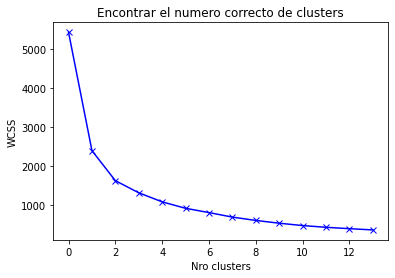

In [132]:
scores = []
range_values = range(1, 15)

for i in range_values:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(pred)
    scores.append(kmeans.inertia_) # La inercia es la suma de los cuadrados de las distancias de las observacion al centro del cluster mas cercano

plt.plot(scores, 'bx-')
plt.title('Encontrar el numero correcto de clusters')
plt.xlabel('Nro clusters')
plt.ylabel('WCSS')
plt.show()    

In [133]:
kmeans = KMeans(3)
kmeans.fit(pred)
labels = kmeans.labels_
y_kmeans = kmeans.fit_predict(sales_df_scaled)

In [134]:
df_cluster_dr = pd.concat([sales_df, pd.DataFrame({'cluster':labels})], axis = 1)
df_cluster_dr.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,Australia,Austria,...,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Large,Medium,Small,cluster
0,30,95.70,2.0,2871.00,2,2003,95,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,34,81.35,5.0,2765.90,5,2003,95,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,41,94.74,2.0,3884.34,7,2003,95,0,0,0,...,1,0,0,0,0,0,0,1,0,0
3,45,83.26,6.0,3746.70,8,2003,95,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,49,100.00,14.0,5205.27,10,2003,95,0,0,0,...,1,0,0,0,0,0,0,1,0,2


In [135]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [sales_df.columns])
cluster_centers 

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,Australia,Austria,...,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Large,Medium,Small
0,0.377011,0.618292,-0.046758,0.705775,-0.001496,0.002701,0.537632,-0.335549,-0.003293,0.025190,...,0.202019,0.014082,-0.039764,-0.300637,-0.052103,0.064894,-0.040624,0.234059,0.796948,-0.907907
1,-0.037171,0.009763,0.078809,-0.271913,-0.043991,0.001642,-0.363043,1.126176,-0.230280,-0.017283,...,-0.721812,-0.364452,-0.348674,3.326275,-0.167454,-0.345470,-0.523371,-0.242672,-0.066000,0.177967
2,-0.462731,-0.773238,0.042317,-0.825149,0.010801,-0.003703,-0.596897,0.189808,0.050884,-0.027912,...,-0.105379,0.056464,0.120426,-0.300637,0.099007,-0.010775,0.156983,-0.242672,-0.980703,1.096370


In [136]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [sales_df.columns])
cluster_centers

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,Australia,Austria,...,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Large,Medium,Small
0,38.764788,96.129930,6.268615,4853.601879,7.086987,2003.816980,122.318024,43.176757,0.064718,0.022965,...,4.384134e-01,1.217815e-01,9.603340e-02,3.608225e-16,1.878914e-02,1.266527e-01,1.983299e-01,1.092554e-01,8.886569e-01,0.002088
1,34.730769,83.855470,6.799145,3053.150128,6.931624,2003.816239,86.128205,89.337607,0.008547,0.017094,...,-1.110223e-16,5.551115e-17,-9.714451e-17,1.000000e+00,1.387779e-17,-4.163336e-17,2.498002e-16,-6.938894e-18,4.572650e-01,0.542735
2,30.585938,68.061788,6.644965,2034.345330,7.131944,2003.812500,76.731771,59.767361,0.078125,0.015625,...,2.925347e-01,1.354167e-01,1.458333e-01,8.326673e-17,4.340278e-02,1.032986e-01,2.795139e-01,-8.326673e-17,-8.326673e-16,1.000000


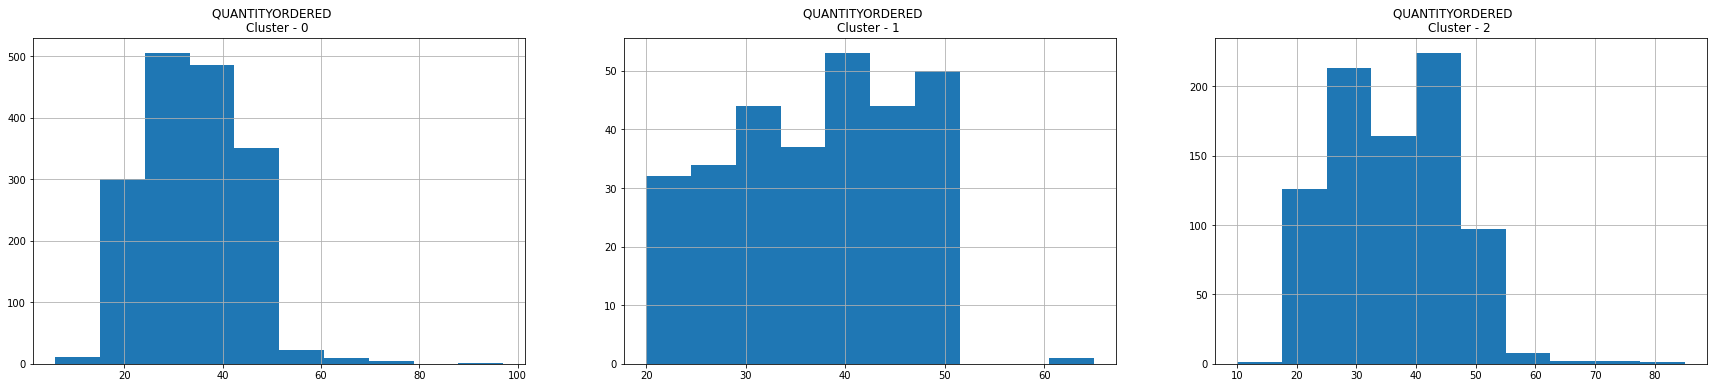

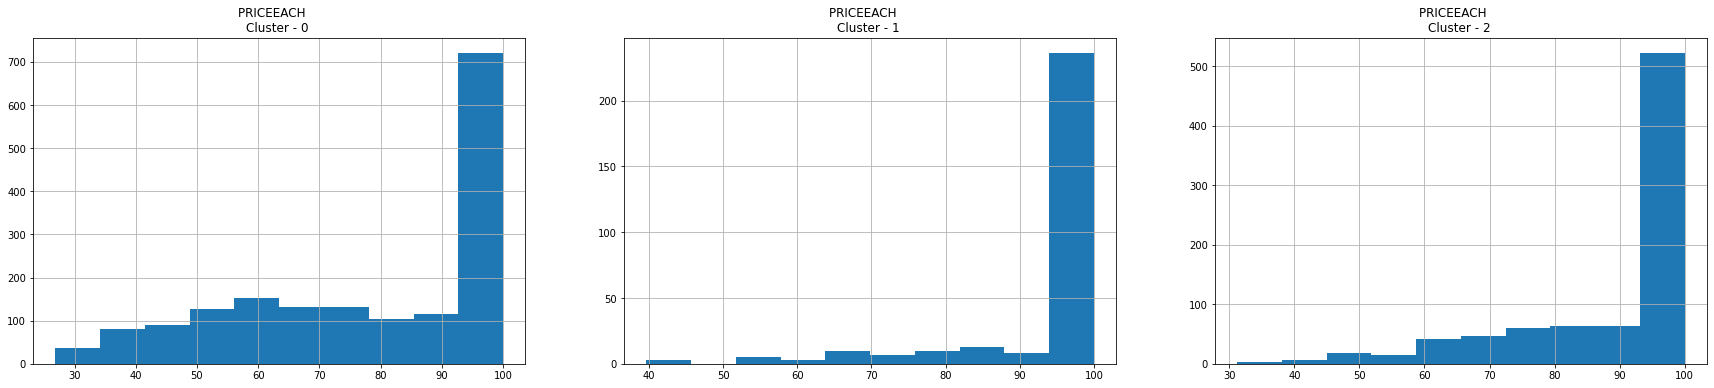

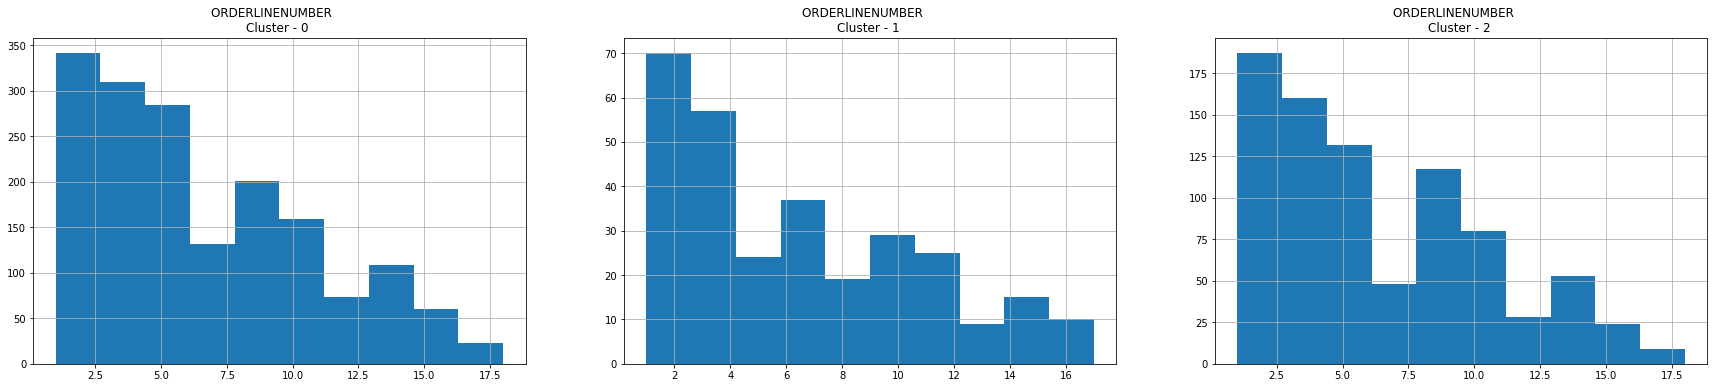

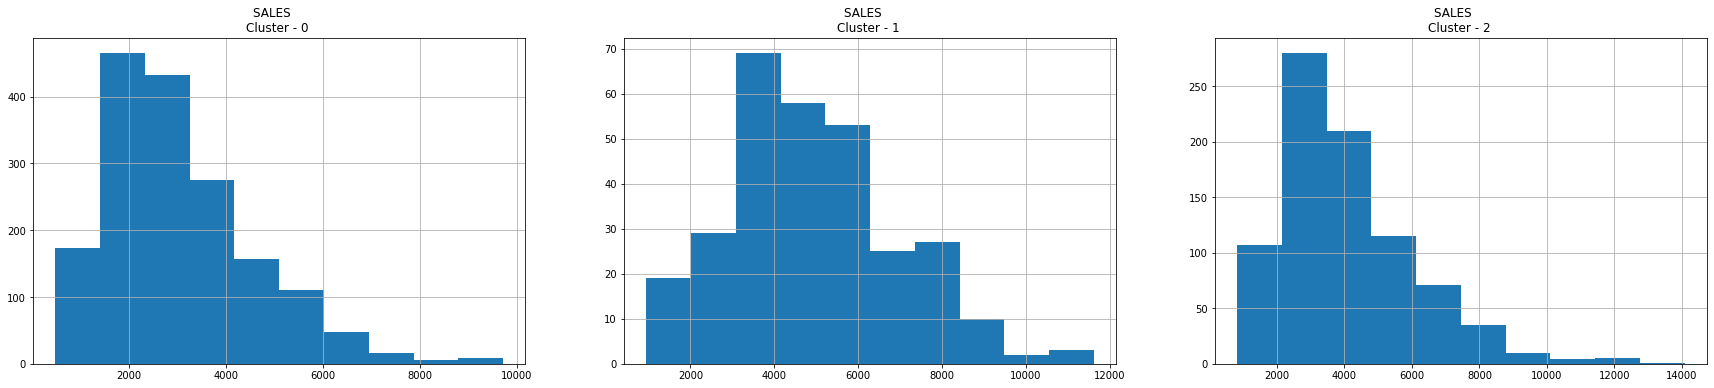

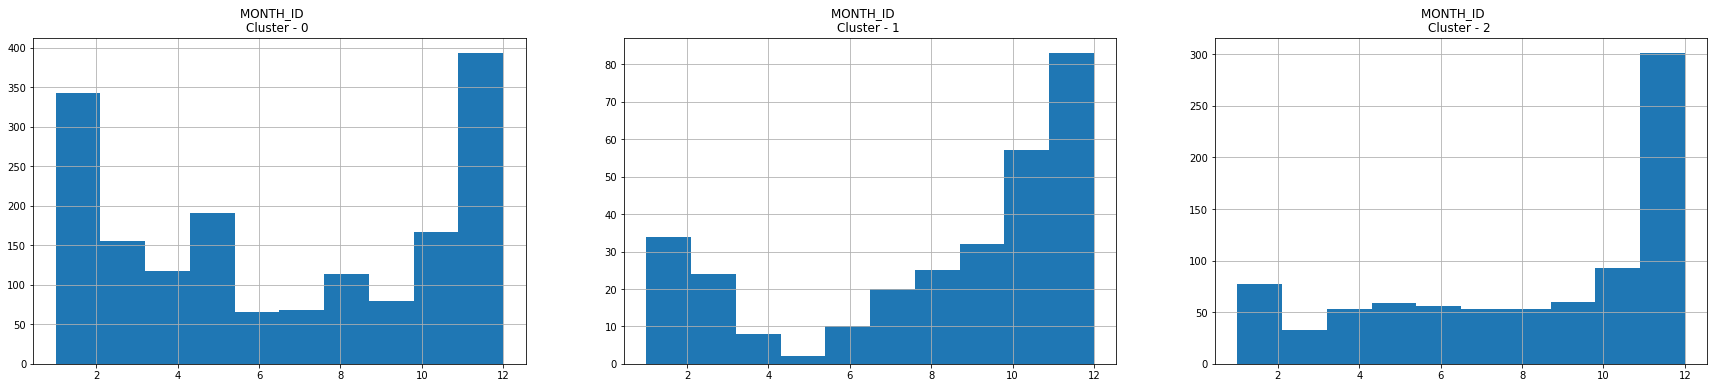

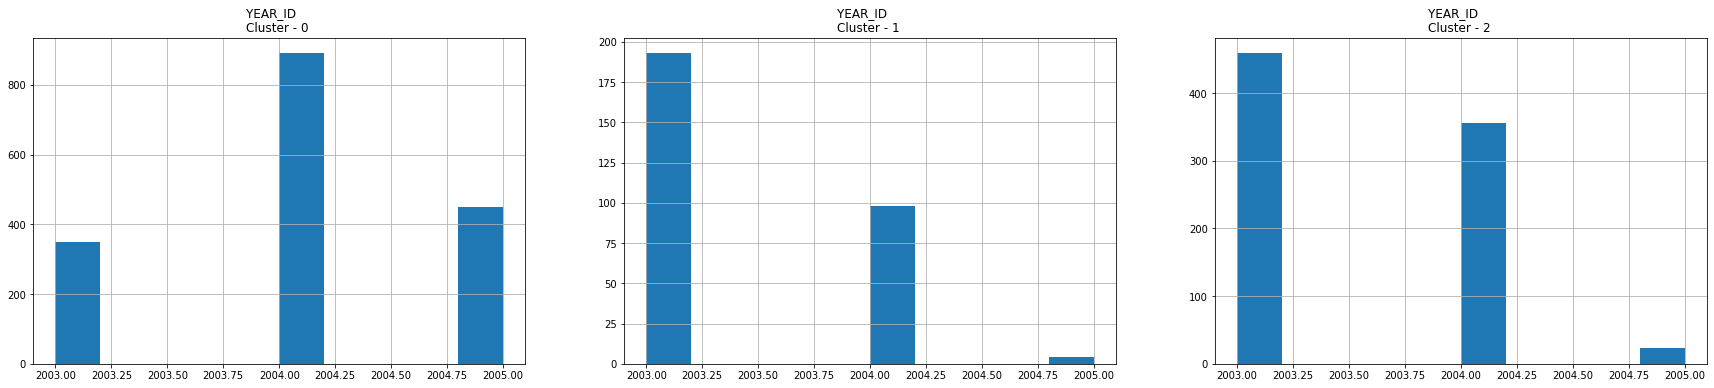

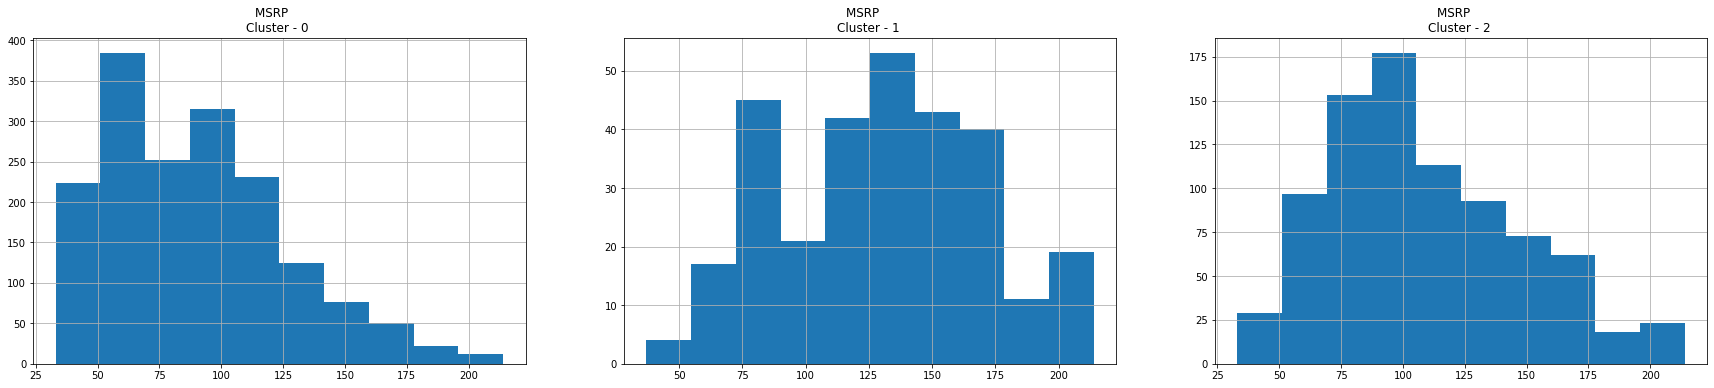

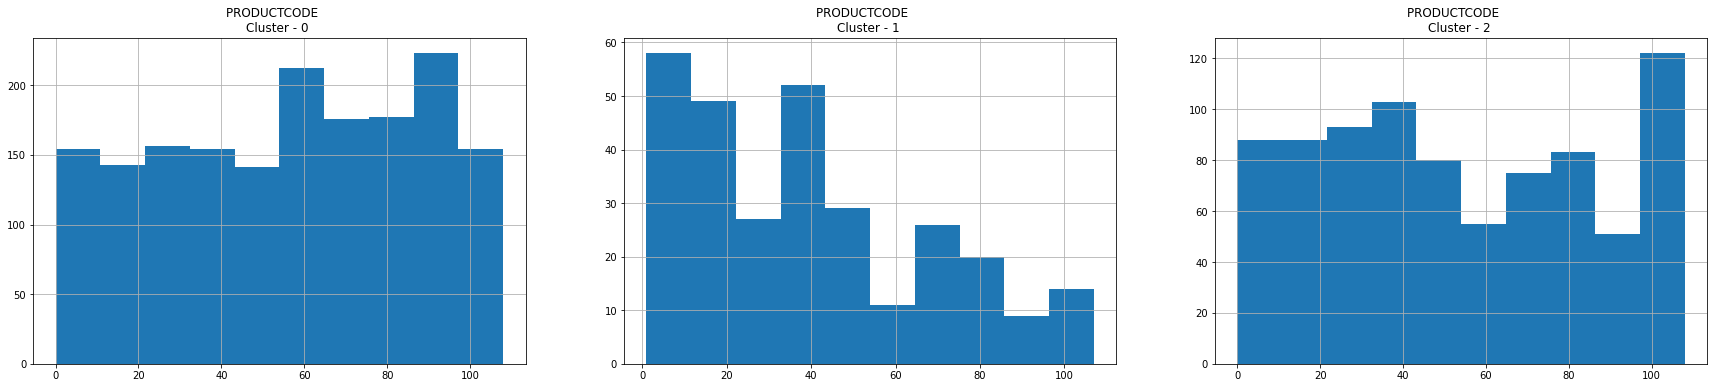

In [137]:
# plot histogram for each feature based on cluster 
for i in sales_df.columns[:8]:
    plt.figure(figsize = (30, 6))
    for j in range(3):
        plt.subplot(1, 3, j+1)
        cluster = df_cluster_dr[df_cluster_dr['cluster'] == j]
        cluster[i].hist()
        plt.title('{}    \nCluster - {} '.format(i,j))

    plt.show()